<h1>Submitted by : Ishan Ojha , CS-21 Assignment no : 3 </h1>

<h2> performing gradient descent in regression </h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# generating some random data  points with 500 points and 2 columns
data = np.random.randn(500, 2)
print (data[0])
# first column indicates x value and second column indicates y value
print ("First column representing x value",data[0,0])
print ("First column representing y value",data[0,1])

[-0.32055787 -0.17368936]
First column representing x value -0.3205578739822695
First column representing y value -0.17368935640454444


we know that equation of linear regression is expressed as : y ^ = mx + b  . we know slope = theta so defining theta we get

In [3]:
theta = np.zeros(2)
print(theta)
# theta 0 representing the value of m and theta 1 represents the value of b 

[0. 0.]


<h4>Loss function </h4>

In [4]:
def loss_function(data,theta):
    
    # getting m and b 
    m = theta[0]
    b = theta[1]
    
    loss = 0
    
    #for each iteration
    for i in range(0, len(data)):
        
        #get x and y
        x = data[i, 0]
        y = data[i, 1]
        
        # to predict the value of y 
        y_hat = (m*x + b)
        
        # to compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)
        
    #mean sqaured error
    mse = loss / float(len(data))
        
    return mse

loss_function(data, theta)

0.937730155630946

In [5]:
#computing the gradient of the loss function
def compute_gradients(data, theta):

    gradients = np.zeros(2)
    
    #total number of data points
    N = float(len(data))
    
    m = theta[0]
    b = theta[1]
    
    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
           
        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))
        
        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))
    
    #add epsilon to avoid division by zero error
    epsilon = 1e-6 
    gradients = np.divide(gradients, N + epsilon)

    return gradients
compute_gradients(data,theta)

array([4.39157998e-04, 3.13893518e-05])

In [6]:
#updating the model parameters
num_iterations = 50000
#learningrate
lr = 1e-2
#defining a list called loss
loss = []
theta = np.zeros(2)
for t in range(num_iterations):
#compute gradients
    gradients = compute_gradients(data, theta)
#update parameter
    theta = theta - (lr*gradients)
#store the loss
    loss.append(loss_function(data,theta))

Text(0.5, 1.0, 'Gradient Descent')

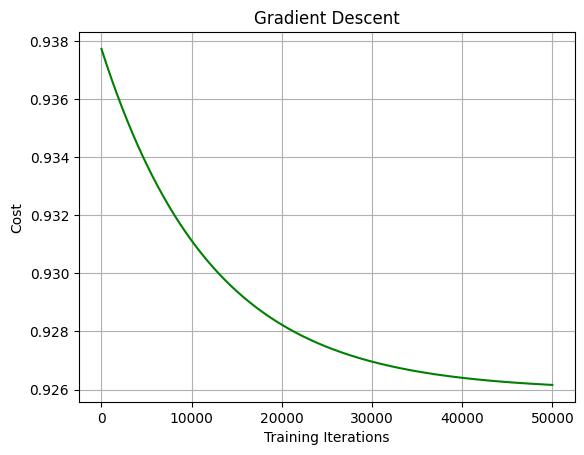

In [7]:
# Plot loss function
plt.plot(loss,c="g")
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

<h4>gradient descent vs stochastic gradient descent</h4>


In [8]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 1000):
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))
    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)


        sample_data = data[0:sample_size[0], :]

        #Compute the gradients for sample_data with respect to theta:

        grad = compute_gradients(sample_data, theta)


        theta = theta - (lr * grad)
    return theta

<h4>momentum based gradient descent</h4>

In [9]:

def momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 1000):

    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):
# computing gradients with respect to theta:

        gradients = compute_gradients(data, theta)


        vt = gamma * vt + lr * gradients


        theta = theta - vt
    return theta

<h4>adaptive method of gradeint descent</h4>

In [10]:
#adagrad function
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 10000):
# Defining the variable called gradients_sum to hold the sum of gradients and
# initializing them with zeros:
    gradients_sum = np.zeros(theta.shape[0])
    for t in range(num_iterations):
#  compute the gradients of loss with respect to theta:
        gradients = compute_gradients(data, theta)
        gradients_sum += gradients ** 2
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))
        theta = theta - (lr * gradient_update)
    return theta